# ECG Signal Classification with Deep Learning: Leveraging AutoEncoder for Accurate Arrhythmia Detection

### Connecting with the Google driver

DataSet Used: Sudden Cardiac Death Holter Database

https://drive.google.com/file/d/1OsyI4ytQ6F4kSX6iESjYrgbqUSoJfAC4/view?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


kaggle ECG Dataset: https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset

### Importing the required dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Loading and Analysing the ECG Dataset

Loading ECG Dataset

In [3]:
filepath = '/content/drive/MyDrive/ECG Dataset/Sudden Cardiac Death Holter Database.csv'
data = pd.read_csv(filepath, dtype='object')

Exploratory ECG Dataset Analysis

In [4]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,30,N,2.0,194.0,0.0032613114624348402,0.15955382698098067,-0.04672563733740808,-0.04672563733740808,-0.12902159927923607,4.0,...,-0.13145054328086112,29.0,17.0,95.0,49.0,-0.13145054328086112,-0.01580885970661799,0.1094934972404279,-0.15362163599272546,-0.20033119945273942
1,30,N,194.0,188.0,-0.05846179128585941,0.06796998862027336,0.2850906173649722,-0.27209265882151684,-0.062109087966537725,25.0,...,-0.04872650965461592,25.0,2.0,76.0,49.0,-0.04872650965461592,0.03465659609149204,0.28226418036949047,-0.013980850329543815,-0.2268711860105882
2,30,N,188.0,194.0,-0.012959400456686896,-0.08974948830990667,0.329466445814664,-0.20465931654079547,-0.01297087132572359,29.0,...,-0.0052562152785730456,29.0,5.0,53.0,19.0,-0.0052562152785730456,0.007638948038945194,0.11619823414356237,0.27155244857577043,-0.11441401044581893
3,30,N,194.0,198.0,-0.03281479971079521,-0.11323553296467287,0.39843719736212396,-0.17819138666939804,-0.06849692070774657,36.0,...,-0.06999231887171818,35.0,26.0,76.0,15.0,-0.06999231887171818,-0.04948891915334409,0.030777281279453263,0.3780753925553463,-0.07438873538915734
4,30,N,198.0,196.0,-0.047353459959422445,0.16483510022363512,0.3646774245194976,-0.2079528206952871,-0.06145691457890758,39.0,...,-0.07200699479729966,35.0,25.0,115.0,55.0,-0.07200699479729966,-0.053250666497615014,0.044583176620691535,0.3132006817928412,-0.15763692536008134


In [5]:
data.shape

(502808, 34)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502808 entries, 0 to 502807
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   record          426591 non-null  object
 1   type            426591 non-null  object
 2   0_pre-RR        426591 non-null  object
 3   0_post-RR       426591 non-null  object
 4   0_pPeak         426591 non-null  object
 5   0_tPeak         426591 non-null  object
 6   0_rPeak         426591 non-null  object
 7   0_sPeak         426591 non-null  object
 8   0_qPeak         426591 non-null  object
 9   0_qrs_interval  426591 non-null  object
 10  0_pq_interval   426591 non-null  object
 11  0_qt_interval   426591 non-null  object
 12  0_st_interval   426591 non-null  object
 13  0_qrs_morph0    426591 non-null  object
 14  0_qrs_morph1    426591 non-null  object
 15  0_qrs_morph2    426591 non-null  object
 16  0_qrs_morph3    426591 non-null  object
 17  0_qrs_morph4    426591 non-nu

### Data Preprocessing

Drop rows with missing values

In [7]:
data.dropna(inplace=True)

Extracted features and labels from the dataset

In [8]:
x_data = data.iloc[:, 2:]
y_label = data[['type']]

In [9]:
value_counts = y_label.value_counts()
print(value_counts)

type
N       238887
VEB      11266
SVEB      1570
F          210
Q           43
dtype: int64


In [10]:
labels = value_counts.index.get_level_values('type').tolist()
labels

['N', 'VEB', 'SVEB', 'F', 'Q']

Visualized data distribution and class proportions using pie charts

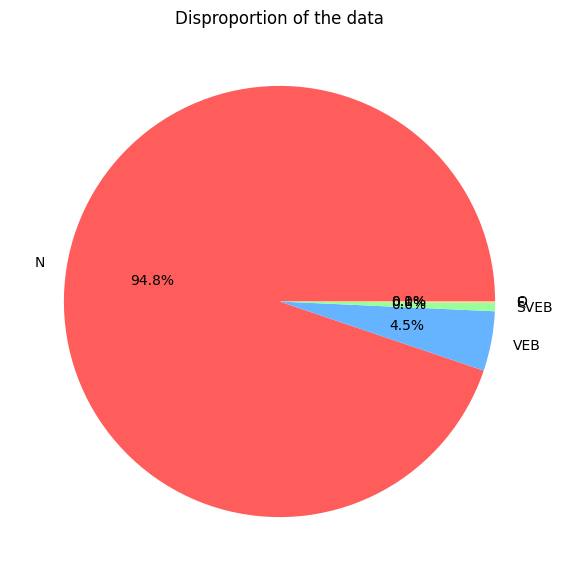

In [11]:
plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0, 0), 0.7, color='white')

value_counts = y_label['type'].value_counts()
labels = value_counts.index.tolist()

plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Disproportion of the data')
plt.show()

In [12]:
original_class_distribution = data['type'].value_counts()
print("Original class distribution:")
print(original_class_distribution)

Original class distribution:
N       238887
VEB      11266
SVEB      1570
F          210
Q           43
Name: type, dtype: int64


Handled class imbalance by resampling data

In [13]:
majority_class = original_class_distribution.idxmax()
majority_class_count = original_class_distribution.max()

target_samples = majority_class_count

upsampled_data = pd.DataFrame()

for label in original_class_distribution.index:
    class_data = data[data['type'] == label]

    if label == majority_class:
        upsampled_data = pd.concat([upsampled_data, class_data])
    else:
        upsampled_data = pd.concat([upsampled_data, resample(class_data, replace=True, n_samples=target_samples, random_state=42)])

balanced_class_distribution = upsampled_data['type'].value_counts()
print("\nBalanced class distribution:")
print(balanced_class_distribution)


Balanced class distribution:
N       238887
VEB     238887
SVEB    238887
F       238887
Q       238887
Name: type, dtype: int64


Plot pie charts for the original and balanced class distributions

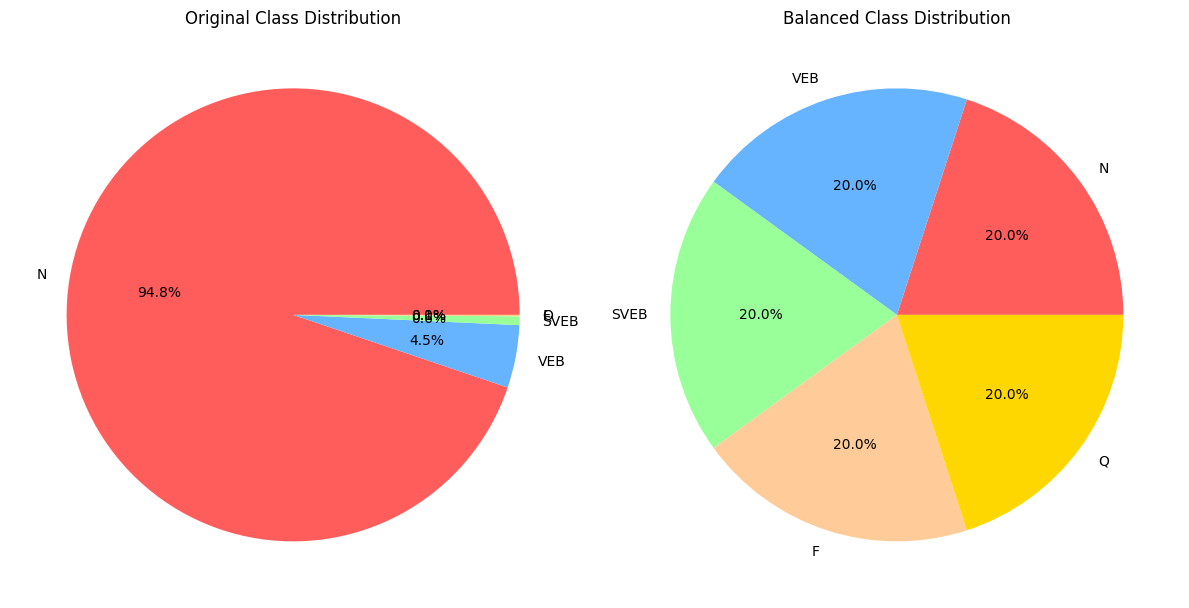

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_class_distribution, labels=original_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Original Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(balanced_class_distribution, labels=balanced_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Balanced Class Distribution')

plt.tight_layout()
plt.show()


Handle class imbalance by resampling

In [15]:
upsampled_data = pd.DataFrame()
target_samples = y_label['type'].value_counts().max()

for label in y_label['type'].unique():
    class_data = data[data['type'] == label]
    if len(class_data) < target_samples:
        upsampled_data = pd.concat([upsampled_data, resample(class_data, replace=True, n_samples=target_samples, random_state=42)])
    else:
        upsampled_data = pd.concat([upsampled_data, class_data])

Resampled data

In [16]:
x_data = upsampled_data.iloc[:, 2:]
y_label = upsampled_data[['type']]

### Label Encoding

Encoded categorical labels

In [17]:
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y_label['type'])
y_label_one_hot = to_categorical(y_label_encoded)

### Data Splitting

Split the data into training and testing sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label_one_hot, test_size=0.2, random_state=42)

### Scaling and Reshape

Scaled the feature data

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Reshape for  Autoencoder input

In [20]:
x_train_reshaped = x_train_scaled[..., np.newaxis]
x_test_reshaped = x_test_scaled[..., np.newaxis]

print("x_train_reshaped shape:", x_train_reshaped.shape)
print("y_train shape:", y_train.shape)
print("x_test_reshaped shape:", x_test_reshaped.shape)
print("y_test shape:", y_test.shape)

x_train_reshaped shape: (955548, 32, 1)
y_train shape: (955548, 5)
x_test_reshaped shape: (238887, 32, 1)
y_test shape: (238887, 5)


### Model Architecture


Defined a Convolutional Neural Network (CNN) model using TensorFlow and Keras

In [21]:
model = Sequential()

# Encoding
model.add(Dense(units=128, activation='relu', input_shape=(x_train_reshaped.shape[1],1)))
model.add(Dense(units=64, activation='relu'))

# Decoding
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=x_train_reshaped.shape[1], activation='linear'))

Compile the model

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Model Training

Train the model

In [23]:
history = model.fit(x_train_reshaped, x_train_reshaped, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
23889/23889 [==============================] - 254s 11ms/step - loss: 9.9581e-04 - val_loss: 2.1043e-08
Epoch 2/10
23889/23889 [==============================] - 232s 10ms/step - loss: 7.9248e-06 - val_loss: 3.1582e-07
Epoch 3/10
23889/23889 [==============================] - 245s 10ms/step - loss: 7.2030e-06 - val_loss: 1.4135e-08
Epoch 4/10
23889/23889 [==============================] - 252s 11ms/step - loss: 6.7659e-06 - val_loss: 3.6649e-06
Epoch 5/10
23889/23889 [==============================] - 245s 10ms/step - loss: 4.8357e-06 - val_loss: 4.2637e-08
Epoch 6/10
23889/23889 [==============================] - 228s 10ms/step - loss: 3.9619e-06 - val_loss: 4.9212e-07
Epoch 7/10
23889/23889 [==============================] - 242s 10ms/step - loss: 4.1881e-06 - val_loss: 1.0675e-05
Epoch 8/10
23889/23889 [==============================] - 233s 10ms/step - loss: 3.2697e-06 - val_loss: 6.2861e-09
Epoch 9/10
23889/23889 [==============================] - 255s 11ms/step - loss:

### Evaluate the model on the test set

In [24]:
reconstructed_data = model.predict(x_test_reshaped)

7466/7466 [==============================] - 43s 6ms/step


Plot original vs reconstructed samples

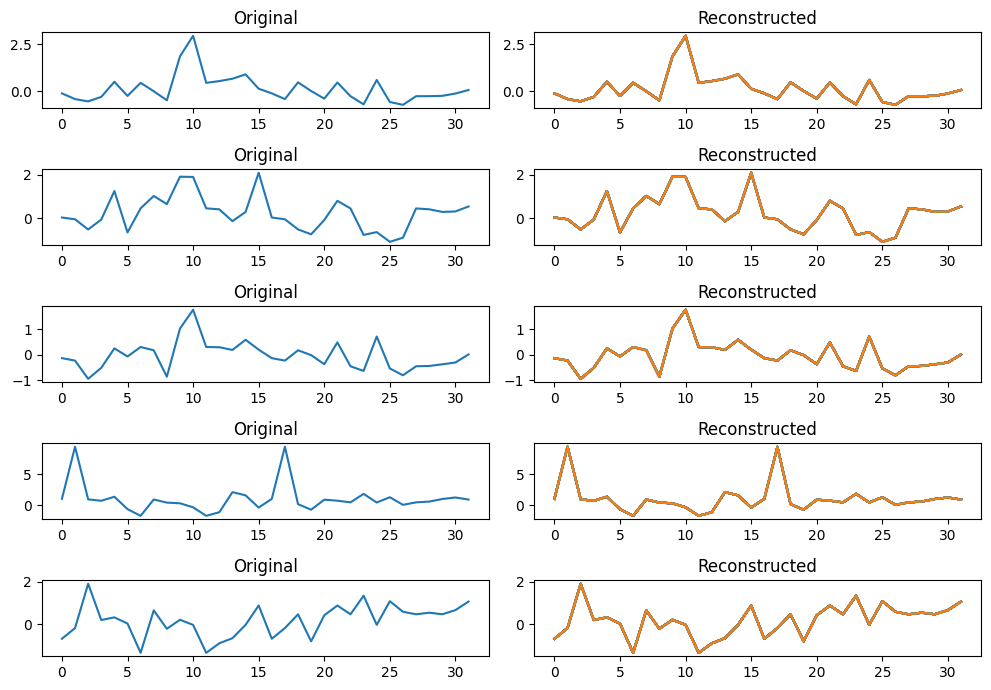

In [25]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.plot(x_test_scaled[i])
    plt.title('Original')
    plt.subplot(5, 2, 2 * i + 2)
    plt.plot(reconstructed_data[i])
    plt.title('Reconstructed')
plt.tight_layout()
plt.show()

In [26]:
y_test_pred_probs = model.predict(x_test_reshaped)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
print(y_test_pred)

7466/7466 [==============================] - 33s 4ms/step
[[10 10 10 ... 10 10 10]
 [15 15 15 ... 15 15 15]
 [10 10 10 ... 10 10 10]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 5  5  5 ...  5  5  5]
 [ 2  2  2 ...  2  2  2]]


### Final Result Visualization

Plotting the loss

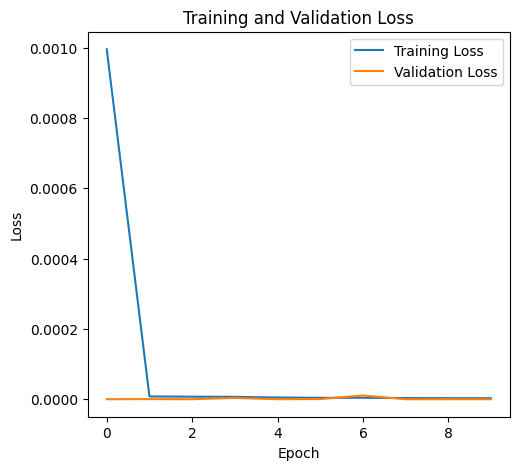

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Plotting validation loss

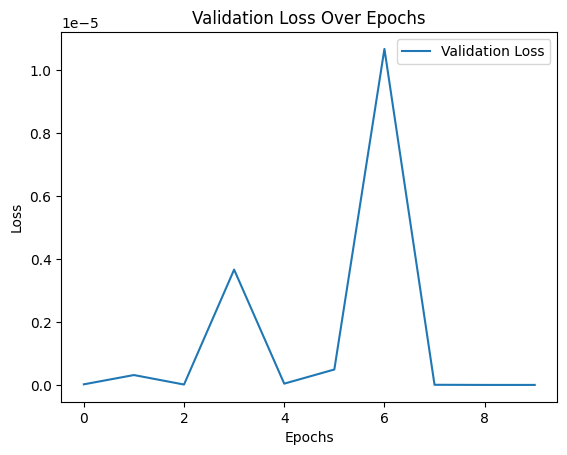

In [28]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model summary

About Model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 128)           256       
                                                                 
 dense_1 (Dense)             (None, 32, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 32, 128)           8320      
                                                                 
 dense_3 (Dense)             (None, 32, 32)            4128      
                                                                 
Total params: 20960 (81.88 KB)
Trainable params: 20960 (81.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
